# Import necessary modules

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
sb.set()

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall

# Import cleaned file

In [2]:
laptop_data_clean = pd.read_csv('./laptop_data_clean.csv', encoding='latin-1')
laptop_data_clean.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_sgd
0,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,2103.31
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1411.34
2,HP,250 G6,Notebook,15.6,1920x1080,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,902.75
3,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,3983.80
4,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,2831.65


In [3]:
## from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
laptop_data_clean['Company'] = le.fit_transform(laptop_data_clean['Company'])
laptop_data_clean['Product'] = le.fit_transform(laptop_data_clean['Product'])
laptop_data_clean['TypeName'] = le.fit_transform(laptop_data_clean['TypeName'])
laptop_data_clean['ScreenResolution'] = le.fit_transform(laptop_data_clean['ScreenResolution'])
laptop_data_clean['Memory'] = le.fit_transform(laptop_data_clean['Memory'])
laptop_data_clean['Cpu'] = le.fit_transform(laptop_data_clean['Cpu'])
laptop_data_clean['Gpu'] = le.fit_transform(laptop_data_clean['Gpu'])
laptop_data_clean['OpSys'] = le.fit_transform(laptop_data_clean['OpSys'])
laptop_data_clean

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_sgd
0,1,297,4,13.3,10,2,8,4,58,8,1.37,2103.31
1,1,298,4,13.3,1,2,8,2,51,8,1.34,1411.34
2,7,50,3,15.6,3,2,8,16,53,4,1.86,902.75
3,1,297,4,15.4,12,3,16,29,9,8,1.83,3983.80
4,1,297,4,13.3,10,2,8,16,59,8,1.37,2831.65
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,555,0,14.0,3,3,4,4,47,5,1.80,1001.66
1299,10,563,0,13.3,13,3,16,29,47,5,1.30,2353.43
1300,10,193,3,14.0,0,4,2,35,40,5,1.50,359.53
1301,7,2,3,15.6,0,3,6,10,21,5,2.19,1199.48


# Helper functions

In [4]:
def visualize_training_history(history):
    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
    f.suptitle('Training History', fontweight='bold', fontsize='x-large')
    
    ax.plot(history.history['loss'], label='Loss (training data)')
    ax.set_title('Loss History')
    ax.set(ylabel='Loss', xlabel='Number of Epochs')
    ax.legend(loc="upper right")
    
    # plt.show()

In [5]:
def standardize(X_train, X_test):
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)
    
    return X_train_std, X_test_std

# Model training

### Data preparation
For the predictors we used the 4 attributes with the highest correlation and for the response we set it as the response. The dataset is split 80:20 for the training and test sets respectively. 

In [6]:
# Prepare the features (X) and target variable (y)
X = laptop_data_clean[['Ram', 'ScreenResolution', 'OpSys', 'Gpu' ]]
y = laptop_data_clean['Price_sgd']
# y = np.log(laptop_data_clean['Price_sgd'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# X_train, X_test = standardize(X_train, X_test)


### Build neural network model
Using the Keras library, we build a neural network model with two hidden layers, one with 32 neurons and the other with 16 neurons. The hidden layers use the ReLu (Rectified Linear Unit) activation layer. 

We compile the model using the Adam optimizer and mean squared error as the loss function. Then, we train the model for 100 epochs with a batch size of 32.

In [7]:
training_histories ={}

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron (for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# model.compile(loss='mean_squared_error', optimizer='adam', 
#                   metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Mean Squared Error on Test Data:", loss)

# Save training history
training_histories['Original'] = history

C:\Users\cheng\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4428361.5000
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4363103.0000
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3880945.0000
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3521770.5000
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3315488.5000
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2724417.2500
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2623841.0000
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1666069.5000
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1160759.0000 
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1081697.6250
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 844979.9375 
Epoch 12/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 791087.8125
Epoch 13/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 756907.2500
Epoch 14/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7

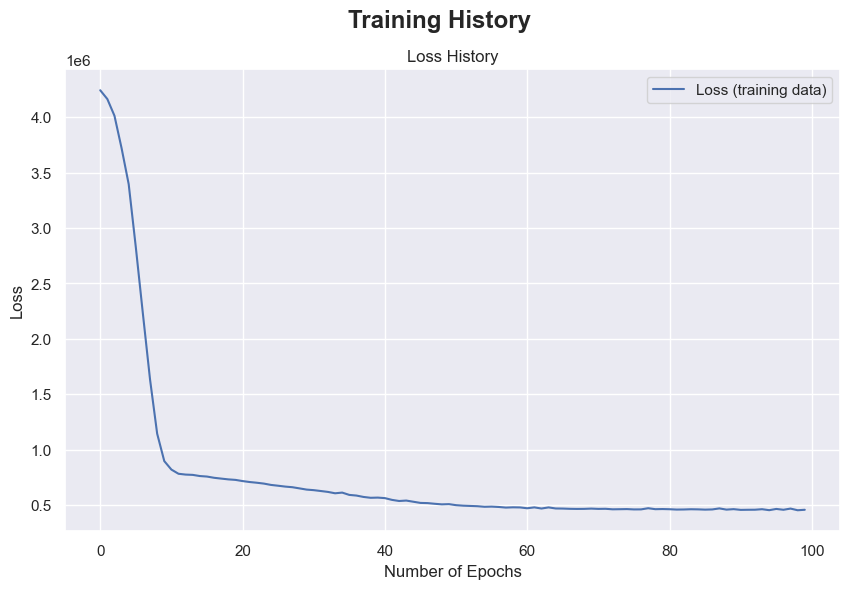

In [8]:
visualize_training_history(history)

In [9]:
predictions = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


### Model performance
Using the graph below which compares the predicted price and the actual price, we can see that the model is not the most accurate. This is also reflected in the high MSE values. 

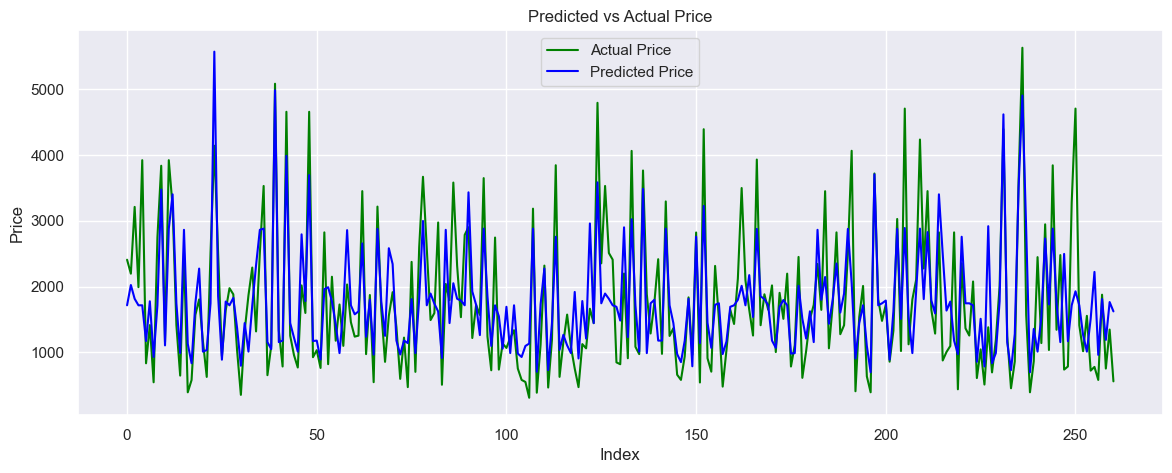

In [10]:
# Plot actual vs predicted values
plt.figure(figsize=(14, 5))
# plt.plot(np.exp(y_test.values), label='Actual Price', color='green')
# plt.plot(np.exp(predictions), label='Predicted Price', color='blue')
plt.plot(y_test.values, label='Actual Price', color='green')
plt.plot(predictions, label='Predicted Price', color='blue')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Predicted vs Actual Price')
plt.legend()
plt.grid(True)
plt.show()

### Testing model predictions
Using the neural network model, we tried predicting the laptop prices given the 4 chosen attributes. The prices predicted were a few hundred dollars off from the actual prices. 

In [11]:
def test_model_predictions():
    # Extract the first few rows for testing
    test_data = laptop_data_clean.head()
    
    # Iterate over the test data and make predictions
    for index, row in test_data.iterrows():
        ram = row['Ram']
        screen_resolution = row['ScreenResolution']
        operating_system = row['OpSys']
        gpu = row['Gpu']

        # print(ram)
        # print(screen_resolution)
        # print(operating_system)
        # print(gpu)
        
        # Prepare input data
        input_data = np.array([[ram, screen_resolution, operating_system, gpu]])
        
        # Make prediction
        prediction = model.predict(input_data)[0][0]
        
        # Find actual price based on input parameters
        actual_price = row['Price_sgd']
        
        print("Test Case - Laptop ID:", index)
        # print("Predicted Price: $", round(np.exp(prediction), 2))
        print("Predicted Price: $", round(prediction, 2))
        print("Actual Price: $", round(actual_price, 2))
        print("="*50)

# Example usage:
test_model_predictions()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Test Case - Laptop ID: 0
Predicted Price: $ 2301.73
Actual Price: $ 2103.31
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Test Case - Laptop ID: 1
Predicted Price: $ 1758.48
Actual Price: $ 1411.34
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Test Case - Laptop ID: 2
Predicted Price: $ 1655.79
Actual Price: $ 902.75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Test Case - Laptop ID: 3
Predicted Price: $ 3124.99
Actual Price: $ 3983.8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Test Case - Laptop ID: 4
Predicted Price: $ 2305.53
Actual Price: $ 2831.65


### Improving Model Performance
Since the neural network model did not perform exceptionally well and the MSE was very high, we tried to improve the model in various methods. 

**1. Normalising data** 
We tried taking the logarithm of the attribute data to help in normalizing the distribution of skewed data and mitigate the effect of outliers.

In [12]:
# Prepare the features (X) and target variable (y)
X = laptop_data_clean[['Ram', 'ScreenResolution', 'OpSys', 'Gpu' ]]
# y = laptop_data_clean['Price_sgd']
y = np.log(laptop_data_clean['Price_sgd'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# X_train, X_test = standardize(X_train, X_test)


When running the same model again with the normalised data, we find that the MSE is much smaller.

In [13]:
training_histories ={}

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron (for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# model.compile(loss='mean_squared_error', optimizer='adam', 
#                   metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Mean Squared Error on Test Data:", loss)

# Save training history
training_histories['Original'] = history

predictions = model.predict(X_test)

Epoch 1/100


C:\Users\cheng\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 311.5762
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.0649
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0656
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2810
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4459
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9196
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7731
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1834
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0433
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8956
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9113
Epoch 12/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9729 
Epoch 13/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9360
Epoch 14/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8370
Epoch 15/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8176 
Epoch 16/10

### Testing model performance with normalised data
When plotting the graph of the actual and predicted prices, we noticed that although the MSE is much better, the graph doesn't really show a significant improvement. It does appear to be slightly more accurate than the previous one but there are still several predictions that are off by a large margin. 

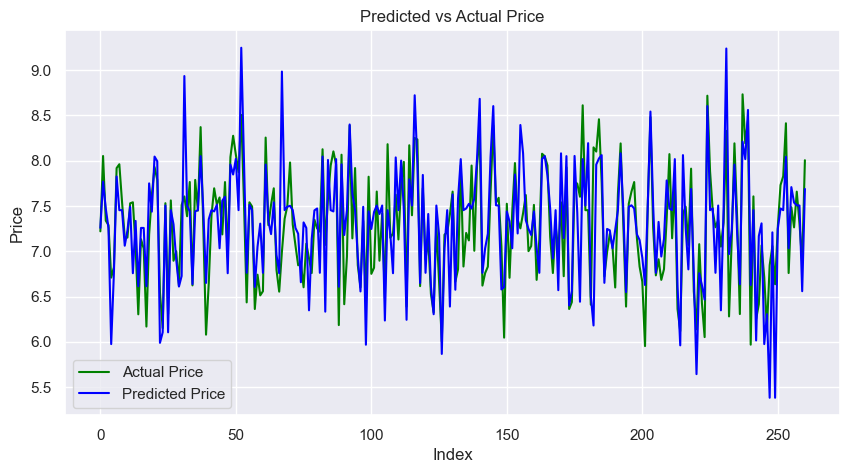

In [14]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
# plt.plot(np.exp(y_test.values), label='Actual Price', color='green')
# plt.plot(np.exp(predictions), label='Predicted Price', color='blue')
plt.plot(y_test.values, label='Actual Price', color='green')
plt.plot(predictions, label='Predicted Price', color='blue')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Predicted vs Actual Price')
plt.legend()
plt.grid(True)
plt.show()

### Testing model predictions with normalised data
Using the neural network model with normalised data, we tried predicting the laptop prices given the 4 chosen attributes. Like previously the prices predicted were a few hundred dollars off from the actual prices which does not show a significant improvement despite the lower MSE.

In [15]:
def test_model_predictions_normalised():
    # Extract the first few rows for testing
    test_data = laptop_data_clean.head()
    
    # Iterate over the test data and make predictions
    for index, row in test_data.iterrows():
        ram = row['Ram']
        screen_resolution = row['ScreenResolution']
        operating_system = row['OpSys']
        gpu = row['Gpu']

        # print(ram)
        # print(screen_resolution)
        # print(operating_system)
        # print(gpu)
        
        # Prepare input data
        input_data = np.array([[ram, screen_resolution, operating_system, gpu]])
        
        # Make prediction
        prediction = model.predict(input_data)[0][0]
        
        # Find actual price based on input parameters
        actual_price = row['Price_sgd']
        
        print("Test Case - Laptop ID:", index)
        print("Predicted Price: $", round(np.exp(prediction), 2))
        # print("Predicted Price: $", round(prediction, 2))
        print("Actual Price: $", round(actual_price, 2))
        print("="*50)

# Example usage:
test_model_predictions_normalised()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Test Case - Laptop ID: 0
Predicted Price: $ 5663.62
Actual Price: $ 2103.31
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Test Case - Laptop ID: 1
Predicted Price: $ 4419.61
Actual Price: $ 1411.34
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Test Case - Laptop ID: 2
Predicted Price: $ 1256.06
Actual Price: $ 902.75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Test Case - Laptop ID: 3
Predicted Price: $ 5901.45
Actual Price: $ 3983.8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Test Case - Laptop ID: 4
Predicted Price: $ 5986.82
Actual Price: $ 2831.65


## Analysis
The outcome of both models were not as great as expected. Although we tried to tune the parameters of the neural network model such as the batch size, the epoch and the number of neurons in each layer, they did not yield a significant improvement to the MSE (from ~400k to ~0.2) and the predictions. 

We also tried normalising the data using the log function to normalised the data since some of the data were quite skewed (refer to data_visualization.ipynb). However, although it did reduce the MSE significantly, it did little to improve the actual predictions. In fact, the predictions were quite a bit worse than the model built without normalising because of the reverse log function that is applied to get the predicted price. 

Looking at the linear regression model (linear_regression.ipynb), it's MSE is also around 400 000, similar to the neural network model. Hence, we concluded that although the MSE is lower with the log function, it may also magnify the differences between small values which may amplify the impact of outliers, leading to a worse prediction. 